In [8]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from pyVPRM.lib.fancy_plot import *
from rioxarray import merge
import numpy as np
import os
import glob
import xarray as xr
import shutil
import cartopy.crs as ccrs
import geopandas as gpd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from IPython.display import display

In [9]:

t_file_fra =  '/scratch/c7071034/DATA/pyVPRM/pyVPRM_examples/wrf_preprocessor/VPRM_input_VEG_FRA_d01_2022.nc'
in_veg_frac = xr.open_dataset(t_file_fra)

In [10]:
in_veg_frac

<xarray.Dataset> Size: 7MB
Dimensions:                  (vprm_classes: 8, south_north: 284, west_east: 338)
Coordinates:
    spatial_ref              int64 8B ...
  * vprm_classes             (vprm_classes) int64 64B 1 2 3 4 5 6 7 8
    lon                      (south_north, west_east) float32 384kB ...
    lat                      (south_north, west_east) float32 384kB ...
Dimensions without coordinates: south_north, west_east
Data variables:
    vegetation_fraction_map  (vprm_classes, south_north, west_east) float64 6MB ...
Attributes:
    title:             VPRM input data for WRF: veg_fraction
    software_version:  3.0
    software_github:   https://github.com/tglauch/pyVPRM
    author:            M. Reif
    institution1:      Innsbruck University
    contact:           matthias.reip@posteo.de
    date_created:      2024-11-18 18:12:40.784636
    comment:           Used VPRM classes: 1 Evergreen forest, 2 Deciduous for...

## Vegetation Fraction

In [11]:

veg_fraction = in_veg_frac['vegetation_fraction_map'] 
# Find the index of the maximum vegetation fraction at each grid cell
dominant_index = veg_fraction.argmax(dim='vprm_classes')

# Create a mask where the dominant vegetation type is retained
dominant_mask = xr.zeros_like(veg_fraction)
for cls in range(veg_fraction.shape[0]):  # Iterate over vprm_classes
    dominant_mask[cls, :, :] = (dominant_index == cls)

# Apply the mask to retain only the dominant vegetation at each grid point
modified_veg_frac = veg_fraction * dominant_mask

# Normalize to maintain sum of fractions as 1 (optional, if needed)
# modified_veg_frac = modified_veg_frac / modified_veg_frac.sum(dim='vprm_classes')

# Save the modified dataset
out_file = "modified_veg_frac.nc"
in_veg_frac['vegetation_fraction_map'] = modified_veg_frac
in_veg_frac.to_netcdf(out_file)

print(f"Modified vegetation fraction map saved to {out_file}")


Modified vegetation fraction map saved to modified_veg_frac.nc


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

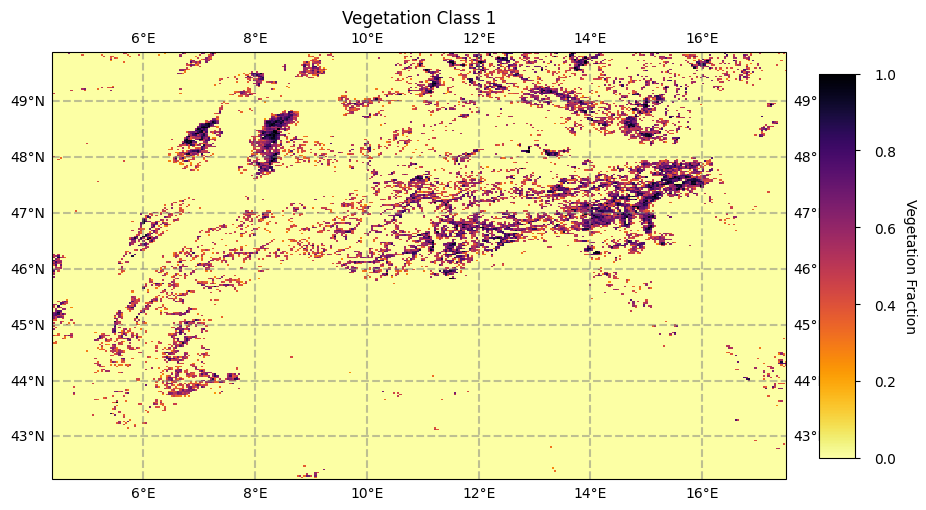

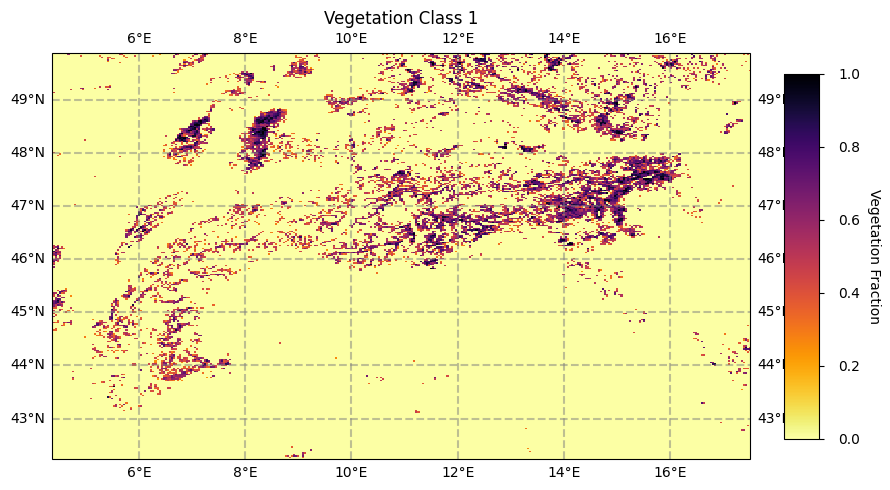

<Figure size 567.726x350.874 with 0 Axes>

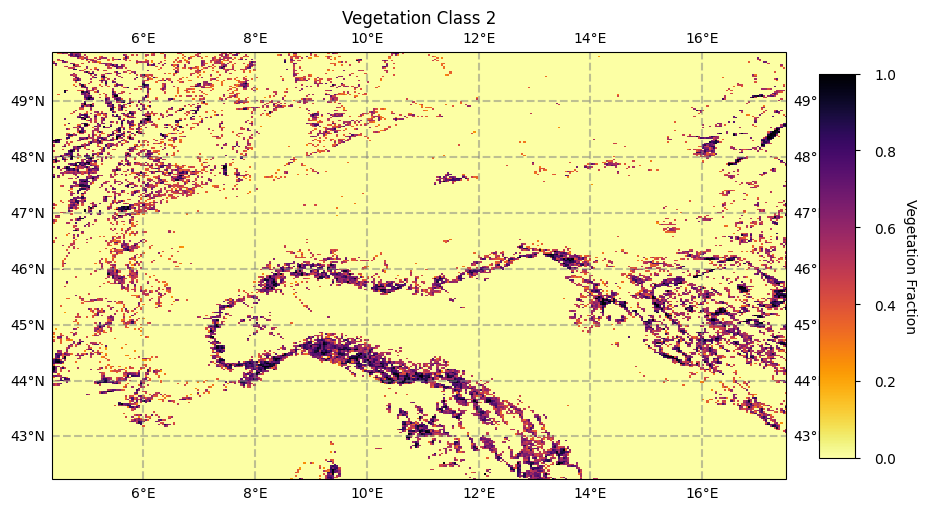

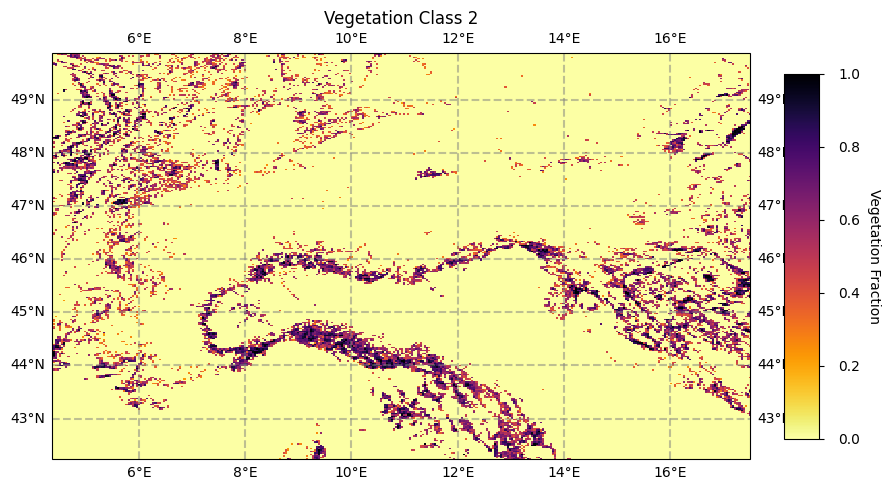

<Figure size 567.726x350.874 with 0 Axes>

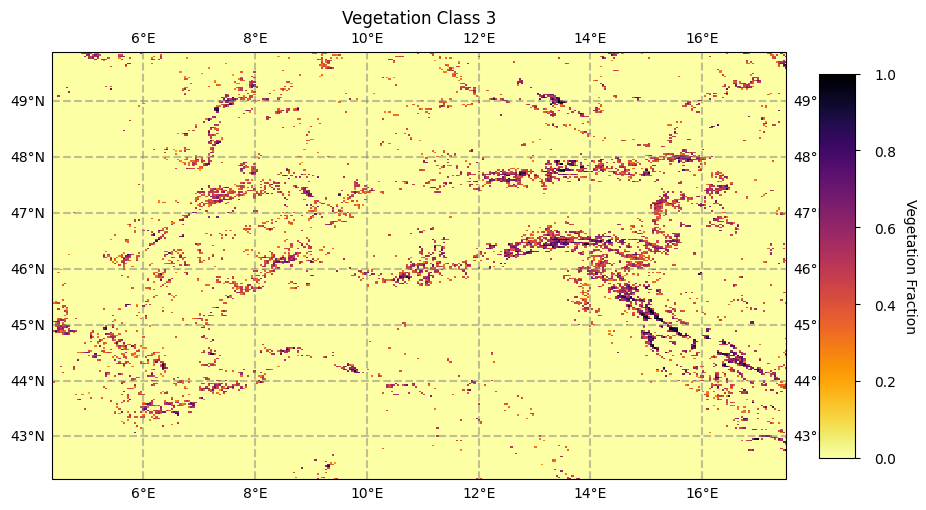

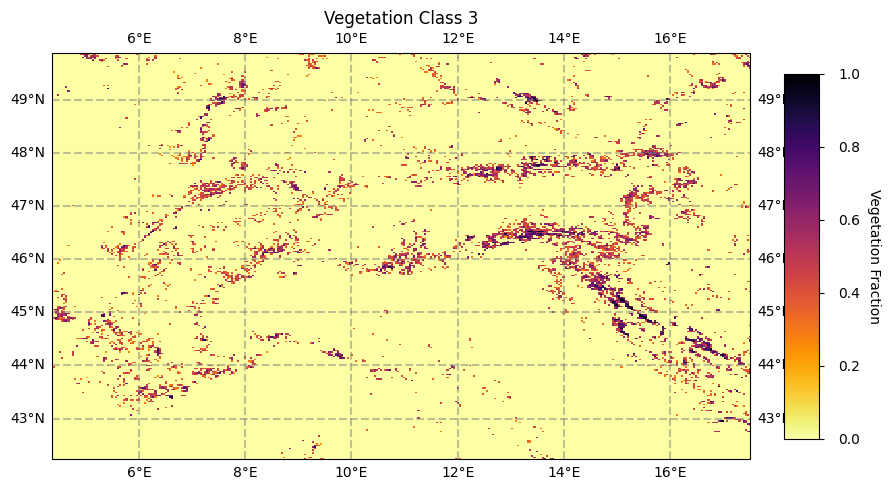

<Figure size 567.726x350.874 with 0 Axes>

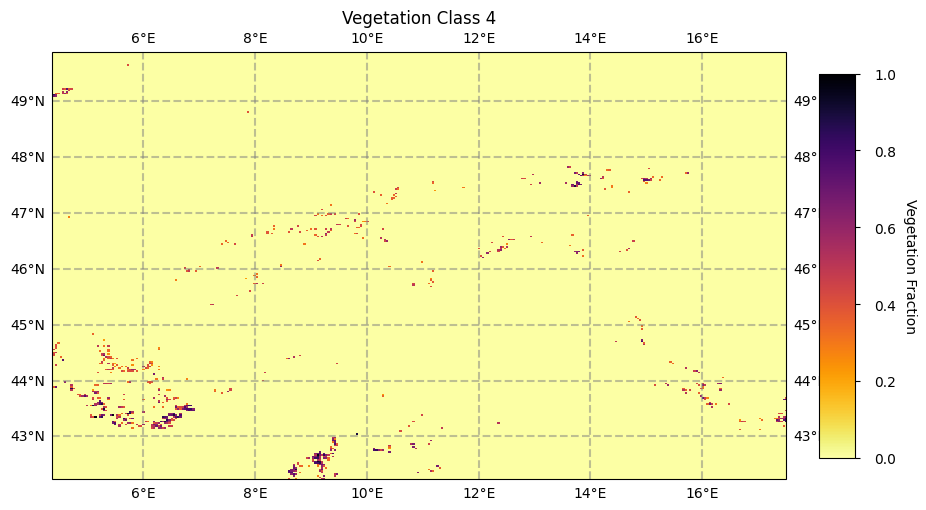

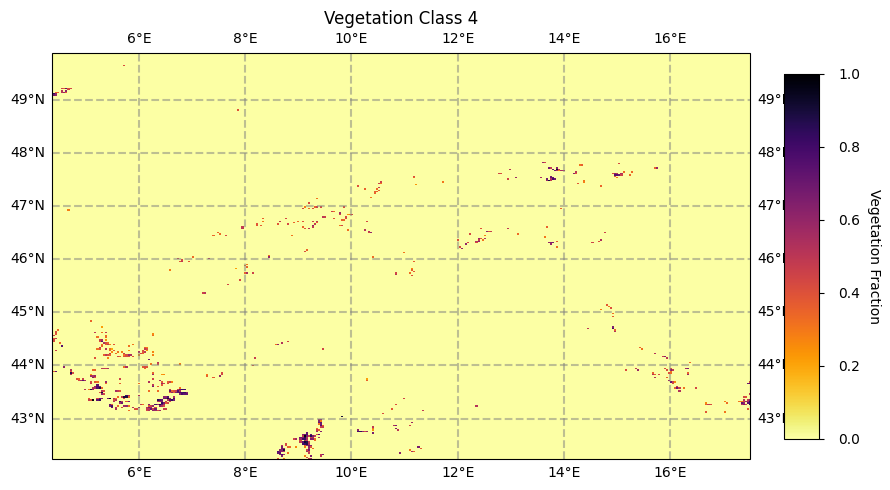

<Figure size 567.726x350.874 with 0 Axes>

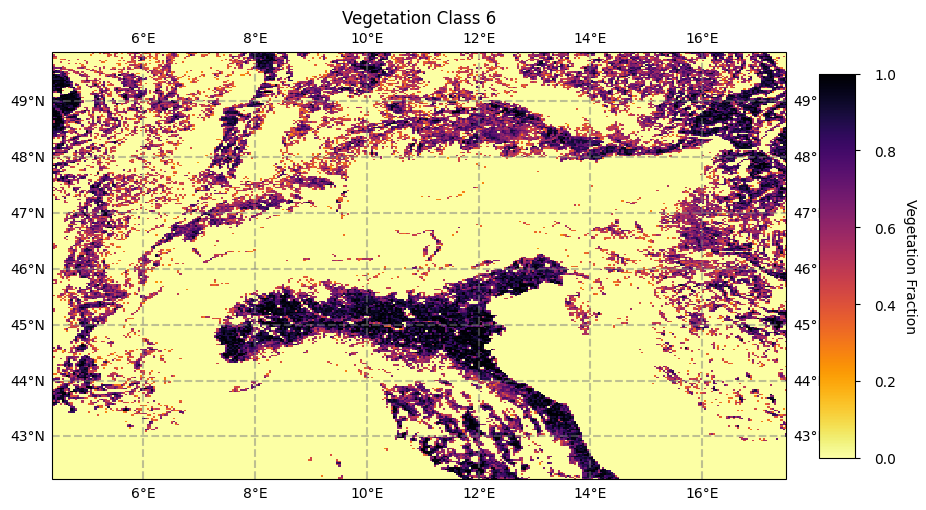

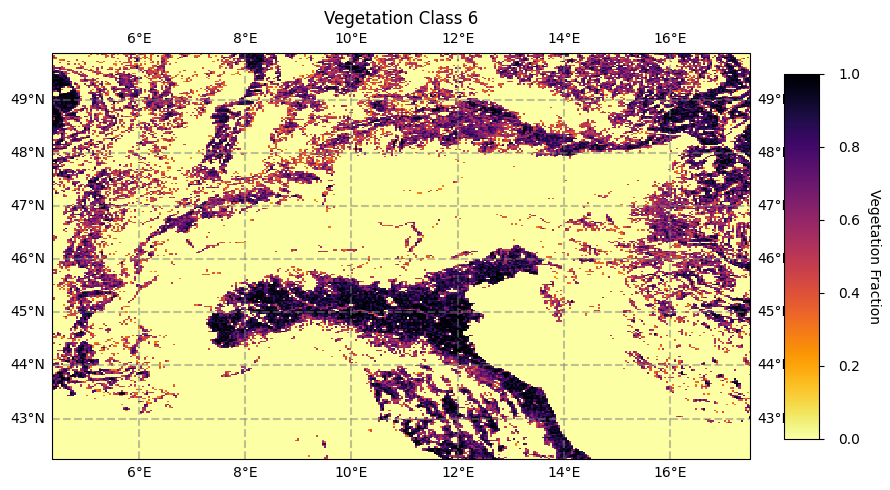

<Figure size 567.726x350.874 with 0 Axes>

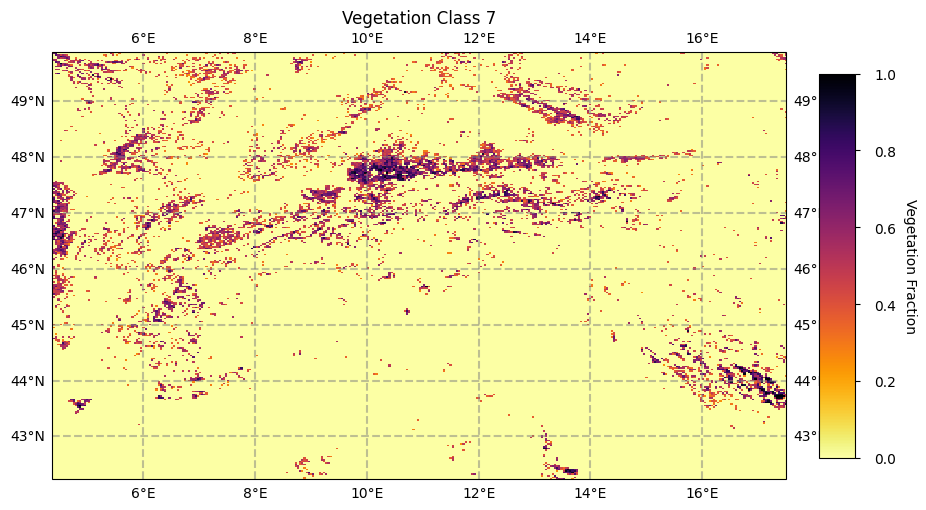

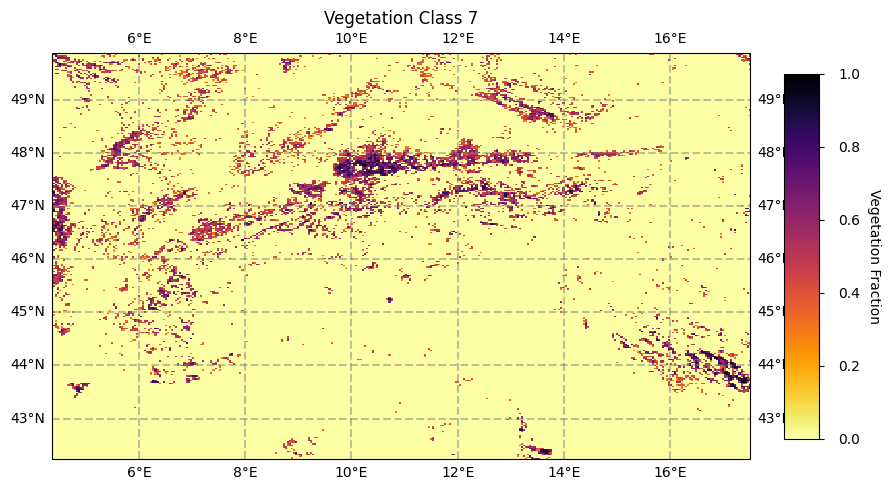

<Figure size 567.726x350.874 with 0 Axes>

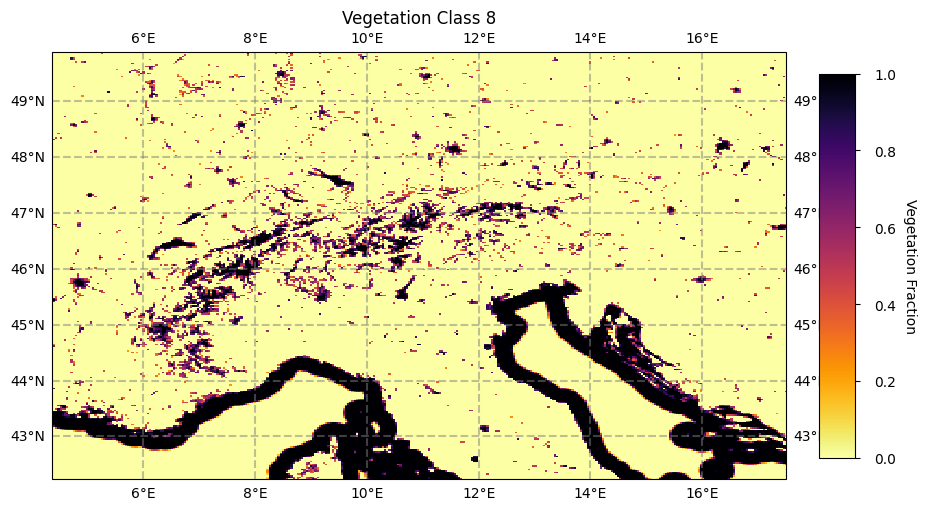

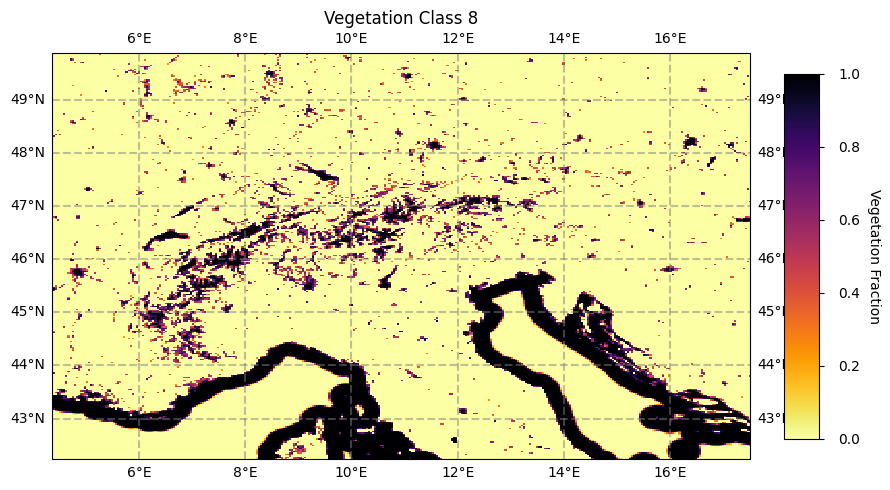

<Figure size 567.726x350.874 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Define the bins and normalize
cmap = plt.cm.inferno_r
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0, 1, 11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Loop through the vegetation classes
for i in range(1, 9):
    if i == 5:
        continue
    # Create a new figure for each vegetation class
    fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Plot the vegetation fraction map for the current class
    cb = in_veg_frac.sel({'vprm_classes': i})['vegetation_fraction_map'].plot.pcolormesh(
        cmap=cmap, ax=ax, x='lon', y='lat', vmin=0, vmax=1.0, add_colorbar=False
    )
    
    ax.set_title(f'Vegetation Class {i}')
    
    # Set limits
    lats = in_veg_frac['lat'].values.flatten()
    lons = in_veg_frac['lon'].values.flatten()
    ax.set_xlim(np.min(lons), np.max(lons))
    ax.set_ylim(np.min(lats), np.max(lats))
    
    # Add gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1.5, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    
    # Add colorbar
    axins = inset_axes(ax, width="5%", height="90%", loc='center right', borderpad=-5)
    cbar = fig.colorbar(cb, cax=axins)
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel('Vegetation Fraction', rotation=270)

    # fig.savefig(f'vegetation_class_{i}.png', dpi=300, bbox_inches='tight')
    # Show the figure
    plt.show()
    display(fig)
    # fig.show()
    plt.clf()
